# Xây dựng mô hình ARMA cho chuỗi dừng
#### 1. MÔ phỏng nhíễu trắng Gauss $a_t \sim WN(0,9)$ 



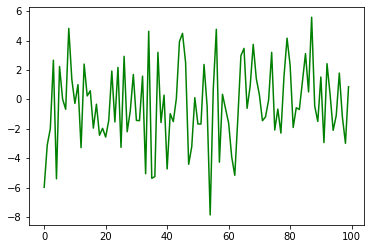

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n = 100
sigma = 3
# np.random.randn(n) sinh ra một số ngẫu nhiên theo luận phân phối chuẩn tắc
# Nhân với sigma thì phân phối at thành WN(0,9)

at = sigma*np.random.randn(n)

# HÌnh mô phỏng nhiễu trắng
plt.plot(at, color='green')
plt.show()



### Mô phỏng ACF của quá trình AR(1)
$$\rho_k =\phi^k$$

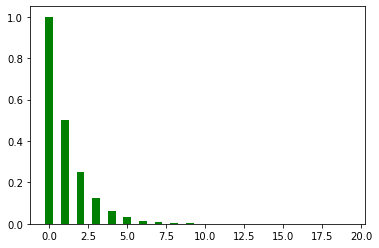

In [2]:
phi = 0.5
K = 20
x_axis = np.arange(K)
ACF = np.array([phi**j for j in range(K)])

plt.bar(x_axis, ACF, color='green', width=0.5)
plt.show()

## 
### MÔ PHỎNG QUÁ TRÌNH AR(2) VÀ TÍNH HÀM TỰ TƯƠNG QUAN RIÊNG PHẦN PACF

$$y_t = 0.4y_{t-1} + 0.5y_{t-2} +a_t$$
$$y_{0} = y_1 =0 $$
$$a_t \sim WN(0,25)$$

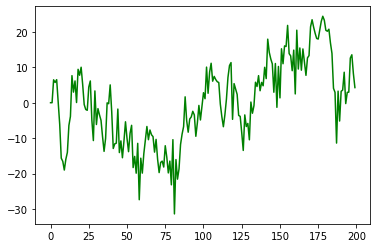

In [3]:
# Sinh dữ liệu quá trình AR(2)
N = 200
yt = np.zeros(N)
at = 5*np.random.randn(N)
for i in range(2,N):
    yt[i] = 0.4*yt[i-1] + 0.5*yt[i-2] + at[i]
    
plt.plot(yt, color= 'green')
plt.show()

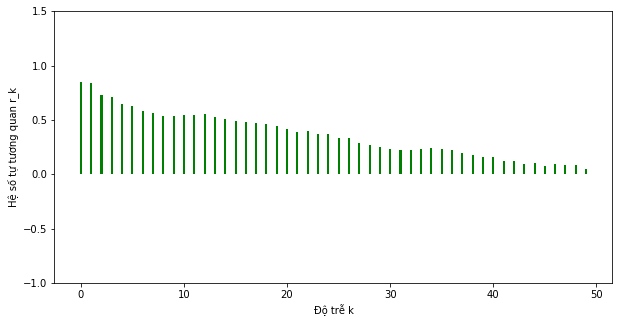

In [4]:
# TÍnh ACF
K = 50
ytb = yt.mean()
ACF = np.zeros(K)
c0 = np.sum((yt-ytb)**2)/N
for k in range(1,K+1):
    ck = np.sum((yt-ytb)[:N-k]*(yt-ytb)[k:N])/N
    rk = ACF[k-1] = ck/c0

# Vẽ đồ thị
fig = plt.figure(figsize = (10,5))
x = np.arange(K)
plt.bar(x, ACF, color='green', width = 0.2)
plt.xlabel("Độ trễ k")
plt.ylabel("Hệ số tự tương quan r_k")
plt.ylim([-1,1.5])
plt.show()


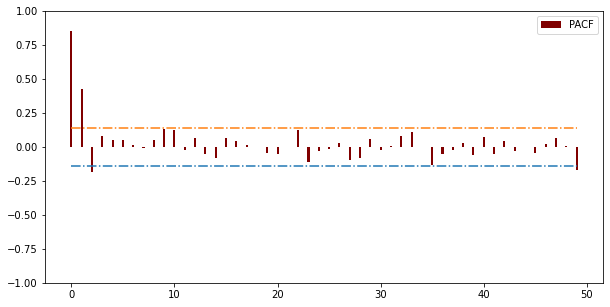

In [5]:
# TÍnh PACF = các hệ số tương quan riêng phần
PACF = np.zeros(K)
for m in range(1,K+1):
    P = np.eye(m)
    for i in range(m):
        for j in range(i):
            P[i,j] = ACF[i-j-1]
        for j in range(i+1,m):
            P[i,j] = ACF[j-i-1];
    PACF[m-1] = np.linalg.solve(P,ACF[:m])[-1]

PACF
#Ve do thi

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, PACF, color='maroon', width=0.2, label='PACF')
ax.plot(x,-2/np.sqrt(N)*np.ones(K), linestyle='dashdot')
ax.plot(x,2/np.sqrt(N)*np.ones(K), linestyle='dashdot')
ax.set_ylim([-1,1])
plt.legend()
plt.show()

## 
## Mô phỏng quá trình MA(1)
$$y_t = a_t-\theta\,a_{t-1}, \ \ \ a_t \sim WN(0,25)$$

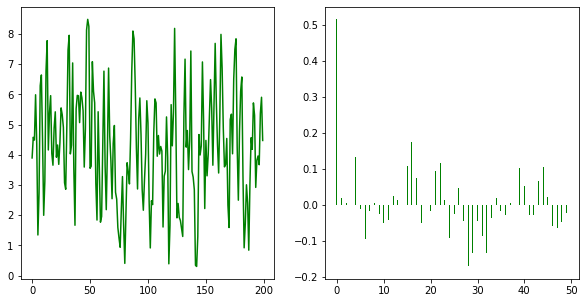

In [6]:
#SInh dữ liệu
N = 200;
theta = -0.8
at = 5*np.random.rand(N+1)
yt = np.array([at[i]-theta*at[i-1] for i in range(1,N+1)])

# TÍnh ACF
K = 50
ytb = yt.mean()
ACF = np.zeros(K)
c0 = np.sum((yt-ytb)**2)/N
for k in range(1,K+1):
    ck = np.sum((yt-ytb)[:N-k]*(yt-ytb)[k:N])/N
    rk = ACF[k-1] = ck/c0

# Vẽ đồ thị
fig,ax = plt.subplots(1,2,figsize = (10,5))
x = np.arange(K)
ax[0].plot(yt, color='green')
ax[1].bar(x, ACF, color='green', width = 0.2)

plt.show()

###  
### 
##  
## Dinh nghia ham ACF va PACF

In [7]:
# Dinh nghia ham ACF va PACF
def sACF(y,K):
    T = len(y)
    ytb = y.mean()
    ACF = np.zeros(K)
    c0 = np.sum((y-ytb)**2)/T
    for k in range(1, K+1):
        ck = np.sum((y-ytb)[:T-k]*(y-ytb)[k:T])/T
        ACF[k-1]= ck/c0
    
    se_ACF = np.zeros(K)
    for i in range(K):
        se_ACF[i] = np.sqrt(1/T*(1+2*np.sum(ACF[:i]**2)))
    return ACF, se_ACF

def sPACF(y,K):
    T = len(y)
    #Lay day dau tien
    ACF = sACF(y,K)[0]
    PACF = np.zeros(K)
    for m in range(1,K+1):
        P = np.eye(m)
        for i in range(m):
            for j in range(i):
                P[i,j] = ACF[i-j-1]
            for j in range(i+1,m):
                P[i,j] = ACF[j-i-1];
        PACF[m-1] = np.linalg.solve(P,ACF[:m])[-1]
    se_PACF = np.array([1/np.sqrt(T) for i in range(K)])
    return PACF, se_PACF



## 
##  Mô hình hoá chỉ số NAO (North Atlantic Oscillation)

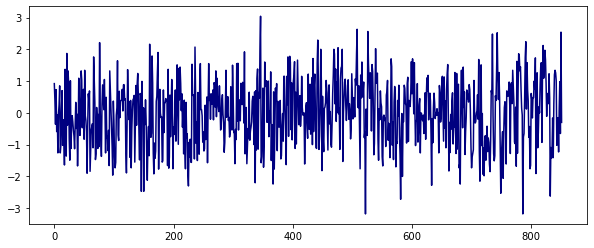

In [8]:

#Load dữ liệu
NAOindex = pd.read_csv('data/NAO.csv')

# biến thành 1 mảng 1 chiều
y = NAOindex.drop(['Year'], axis=1).to_numpy().flatten()

#Vẽ biểu đồ chỉ số NAO
plt.subplots(figsize = (10,4))
plt.plot(y, color='navy')
plt.show()

### Nhận xét: giống nhiễu trắng, có thể khác nhưng bậc không quá cao


In [9]:
# Tính trung bình, phương sai của chuỗi yi
T = len(y)
ytb = y.mean()
var_yt = np.sum((y-ytb)**2)/T
print("Trung bình = %f, phương sai = %f" %(ytb, var_yt))

Trung bình = 0.000458, phương sai = 1.043730


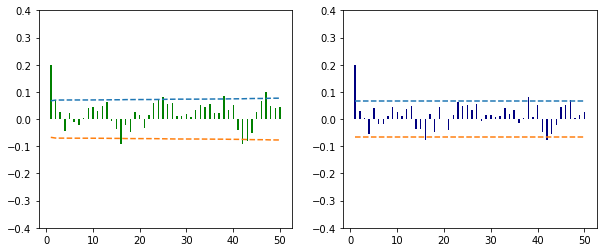

In [13]:
K = 50
# TÍnh ACF: rk và se_(rk)
#se la sai so tieu chuan

ACF, se_ACF = sACF(y, K)

# ytb = y.mean()
# ACF = np.zeros(K)
# c0 = np.sum((yt-ytb)**2)/T
# for k in range(1,K+1):
#     ck = np.sum((y-ytb)[:T-k]*(y-ytb)[k:T])/T
#     rk = ACF[k-1] = ck/c0

# # Tính se_ACF
# se_ACF = np.zeros(K)
# for i in range(1,K+1):
#     se_ACF[i-1] = np.sqrt(1/T*(1+2*np.sum(ACF[:i]**2)));

#Tinh PACF pkk và se(pkk) (sai so tieu chuan)

PACF, se_PACF = sPACF(y,K)

# PACF = np.zeros(K)
# for m in range(1,K+1):
#     P = np.eye(m)
#     for i in range(m):
#         for j in range(i):
#             P[i,j] = ACF[i-j-1]
#         for j in range(i+1,m):
#             P[i,j] = ACF[j-i-1];
#     PACF[m-1] = np.linalg.solve(P,ACF[:m])[-1]

# #se_PACF
# se_PACF = np.array([1/np.sqrt(T) for i in range(K)])


# Vẽ đồ thị
fig,ax = plt.subplots(1,2,figsize = (10,4))
x = np.arange(1,K+1)
ax[0].bar(x, ACF, color='green', width = 0.3, label='ACF')
ax[0].plot(x, 1.96*se_ACF, linestyle='dashed')
ax[0].plot(x, -1.96*se_ACF, linestyle='dashed')
ax[0].set_ylim([-0.4, 0.4])


ax[1].bar(x, PACF, color='navy', width = 0.3, label='PACF')
ax[1].plot(x, 1.96*se_PACF, linestyle='dashed')
ax[1].plot(x, -1.96*se_PACF, linestyle='dashed')
ax[1].set_ylim([-0.4, 0.4])

plt.show()


#### => khác 0 không đáng kể từ độ trễ k = 1,2,3,....
#### => NAO có thể là quá trình
* AR(1): $y_t = \phi y_{t-1} + a_t$ với  $a_t \sim WN(0,\sigma^2)$

* MA(1): $y_t = a_t - \theta a_{t-1}$ với  $a_t \sim WN(0,\sigma^2)$

## Ước lượng mô hình AR(1) cho NAO
$$y_t = \phi y_{t-1} + a_t$$
$$a_t \sim WN(0, \sigma^2)$$

In [30]:
# ƯỚc lượng tham số
from sklearn.linear_model import LinearRegression
xdata = y[:-1]
ydata = y[1:]

#fit_intercept=False: luôn đi qua gốc toạ độ, không có hệ số tự do
model = LinearRegression(fit_intercept=False)

# Chuyển xdata thành ma trận
X = xdata[:, np.newaxis]
#Khớp 2 cái lại với nhau 
model.fit(X,ydata)
print("Tham so beta", model.coef_)

# Sai số tiêu chuẩn của ước lượng tham số mô hình
at = ydata - model.predict(X)
sigma = np.sqrt(np.sum(at**2)/(len(at)-1))
se_beta = sigma*np.sqrt(np.diag(np.linalg.inv(X.T@X)))
print("Sai số tiêu chuẩn của beta", se_beta)
print("Sigma = ", sigma)


Tham so beta [0.20019535]
Sai số tiêu chuẩn của beta [0.03359046]
Sigma =  1.0016315196996892


In [31]:
#Đánh giá mô hình bằng hệ số xác định (R^2) và thống kê Q(k)
#biến thiên sai số
SE = np.sum(at**2)
# biến thiên tổng thể
ST = np.sum((ydata - ydata.mean())**2)

R2 = 1 - SE/ST
# R2 giải thích độ biến thiên của 4% dữ liệu
print('R2', R2)



R2 0.04011194477254687


=> Mô hình chỉ giải thích được biến thiên của 4% dữ liệu

In [27]:
# Tính thống kê Q(k)
def Qstat(at,k):
    at_ACF = sACF(at,k)[0]
    n = len(at)
    Qstat = 0
    for i in range(k):
        Qstat += n*(n+2)*at_ACF[i]**2/(n-i-1)
    return Qstat

k = 12
print("Giá trị thống kê Q(%d) = %f" %(k,Qstat(at,k)))
    


Giá trị thống kê Q(12) = 8.571582


Nếu $a_t$ là nhiễu trắng Gauss, thì $Q(k) \sim \chi^2(k-1)$. Với $Q(12)=8.571582$, ta tính được p-value = 0.66137 => với mức ý nghĩa 5%, ta chấp nhận rằng $a_t$ là nhiễu trắng.

### Ước lượng mô hình MA(1) cho dữ liệu NAO:
 $$y_t = a_t - \theta a_{t-1}$$ với  $$a_t \sim WN(0,\sigma^2)$$
 
 Để tính tham số $\theta$, ta sử dụng $\widehat{a}_t$ tính được từ mô hình AR(1). Khi đó, ta tìm $\theta$ từ phương trình hồi quy:
 $$y_t = - \theta \widehat{a}_{t-1} + a_t $$
 

In [33]:
# ƯỚc lượng tham số
from sklearn.linear_model import LinearRegression
xdata = at[:-1]
ydata = y[2:]

#fit_intercept=False: luôn đi qua gốc toạ độ, không có hệ số tự do
model = LinearRegression(fit_intercept=False)

# Chuyển xdata thành ma trận
X = xdata[:, np.newaxis]
#Khớp 2 cái lại với nhau 
model.fit(X,ydata)
print("Tham so beta", model.coef_)

# Sai số tiêu chuẩn của ước lượng tham số mô hình
e = ydata - model.predict(X)
sigma = np.sqrt(np.sum(e**2)/(len(e)-1))
se_beta = sigma*np.sqrt(np.diag(np.linalg.inv(X.T@X)))
print("Sai số tiêu chuẩn của beta", se_beta)
print("Sigma = ", sigma)


Tham so beta [0.19378662]
Sai số tiêu chuẩn của beta [0.03440298]
Sigma =  1.0042619079250648


In [35]:
# Đánh giá mô hình bằng hệ số xác định R^2
SE = np.sum(e**2)
ST = np.sum((ydata -ydata.mean())**2)
R2 = 1 - SE/ST
print('R2 =',  R2)

R2 = 0.03602465826261414


In [39]:
# Tính thống kê Q(k)
# def Qstat(at,k):
#     at_ACF = sACF(at,k)[0]
#     n = len(at)
#     Qstat = 0
#     for i in range(k):
#         Qstat += n*(n+2)*at_ACF[i]**2/(n-i-1)
#     return Qstat
k = 12
print("Giá trị thống kê Q(%d) = %f" %(k,Qstat(e,k)))

Giá trị thống kê Q(12) = 12.065169


#  
#  
### Mô hình hoá dữ liệu *"weekly loan applications"
trong textbook "INTRODUCTION TO TIME SERIES ANALYSIS AND FORECASTING" , trang 370

In [ ]:
loan = pdf.read_excel('Loan')